# Lorenz Attractor

In [1]:
from utils import *

In [2]:
from ripser import Rips

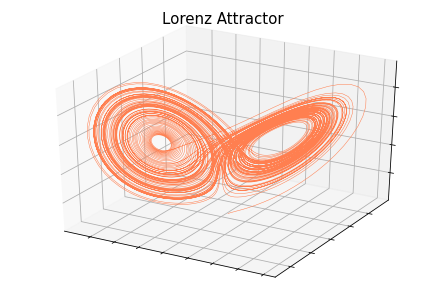

In [3]:
# Lorenz parameters and initial conditions
sigma, beta, rho = 10, 8/3, 28
x0, y0, z0 = 1,1,1
# Maximum time point and total number of time points
tmax, n = 100, 10000
x,y,z = simulate(Lorenz, sigma, beta, rho, x0, y0, z0, tmax, n)
fig = plt.figure()

ax = Axes3D(fig)

ax.plot(x, y, z, 'b-', lw=0.5, color = 'coral')

ax.set_title('Lorenz Attractor', fontsize=15)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
plt.savefig('lorenz.png')
plt.show()



**Observation**

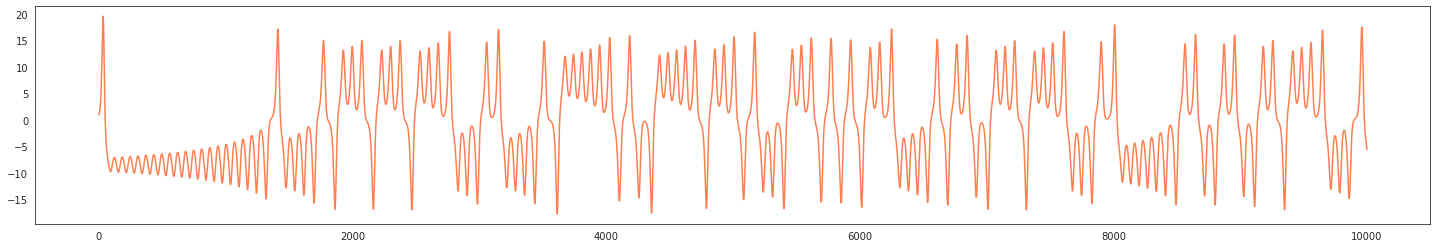

In [4]:
import seaborn as sns
sns.set_style('white')
plt.figure(figsize=(25,4))
plt.plot(x, color='coral')
plt.savefig('x_lorenz.png')


In [5]:
x_noise = x + np. random.normal(0, .1, x.shape)

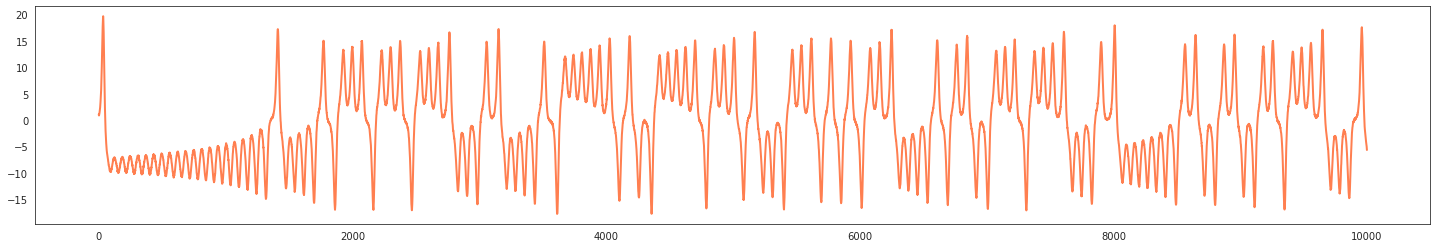

In [6]:
plt.figure(figsize=(25,4))
plt.plot(x_noise, color='coral', linewidth = 2)
plt.savefig('x_lorenz_noise.png')


**Delay Coordinate Embedding**

$X(t) = (x(t), x(t+\tau), x(t + 2\tau), \cdots, x(t+m\tau))$

In [7]:
def delay_embedding(s, T, d):
    n=0
    N=len(s)
    step = 1
    X = []
    for i in range(d):
        X.append(s[n+i*T: N-(d-1-i)*T:step])
    return X

In [8]:
def plot_trajectories(x,y,z,title, type_plot):
    # Plot the attractor using a Matplotlib 3D projection.
    fig = plt.figure(figsize=(5,3))

    ax = Axes3D(fig)
    
    if type_plot == 'line':
        ax.plot(x, y, z, 'b-', lw=0.3, color = 'coral')
    
    if type_plot == 'scatter':
        ax.scatter(x, y, z, s=0.5)

    #ax.set_xlabel('x', fontsize=10)
    #ax.set_ylabel('y', fontsize=10)
    #ax.set_zlabel('z', fontsize=10)
    #plt.tick_params(labelsize=5)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    ax.set_title(title, fontsize=12)
    plt.savefig('lorenz_embedding.png')
    plt.show()

####   $\tau=10, D=3$

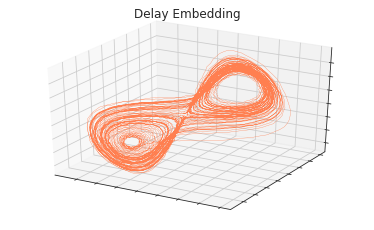

In [9]:
X = delay_embedding(x_noise, 10, 3)
plot_trajectories(X[0], X[1], X[2], 'Delay Embedding', 'line')

In [17]:
# Uniform re-sampling
lorenz  = np.column_stack((X[0], X[1], X[2]))
resampled_lorenz = voxel_down_sample(lorenz, 0.8)
print(len(lorenz), len(resampled_lorenz))

9980 2957


In [ ]:
# Euclidea
sns.set_style('white')
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)
plt.title('D=3 Euclidean distance')
plt.savefig('PH_lorenz_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


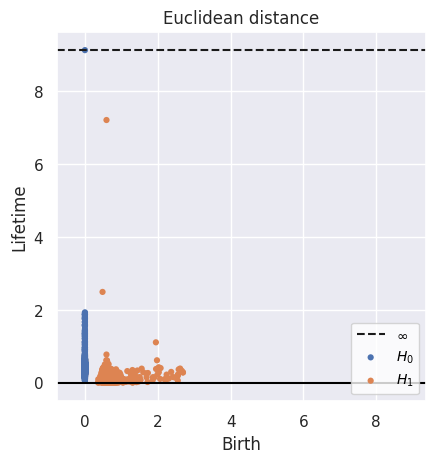

In [30]:
# Euclidea
sns.set()
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)
plt.title('Euclidean distance')
plt.savefig('PH_lorenz.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 59s, sys: 2.28 s, total: 2min 1s
Wall time: 2min 1s


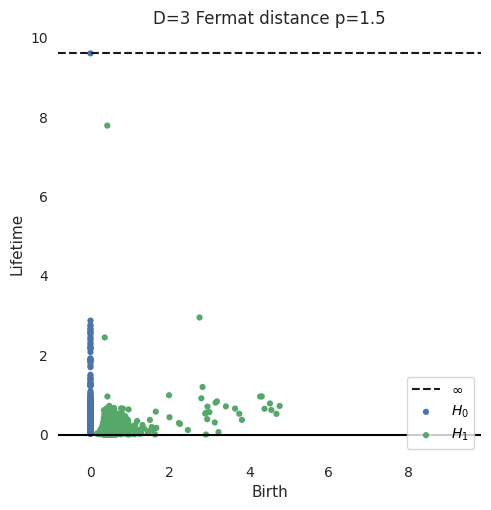

In [101]:
%%time
sns.set_style('white')
fermat_distances = compute_fermat_distance(resampled_lorenz, 1.5)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('D=3 Fermat distance p=1.5')
plt.savefig('PH_lorenz_p=1.5_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 2min 5s, sys: 2.32 s, total: 2min 7s
Wall time: 2min 7s


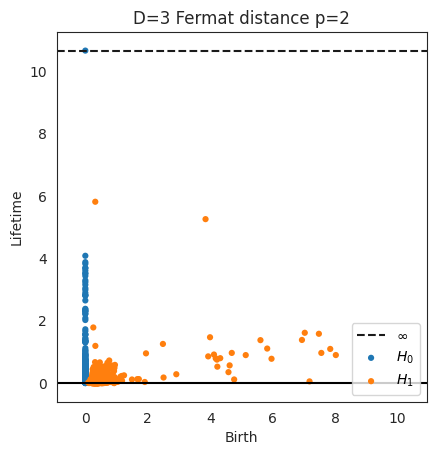

In [90]:
%%time
sns.set_style('white')
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('D=3 Fermat distance p=2')
plt.savefig('PH_lorenz_p=2_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 7s, sys: 1.22 s, total: 1min 8s
Wall time: 1min 8s


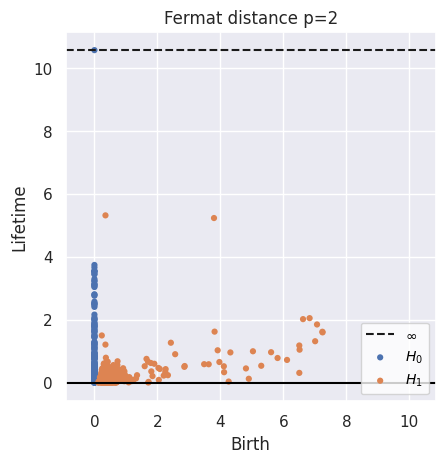

In [29]:
%%time
sns.set()
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('Fermat distance p=2')
plt.savefig('PH_lorenz_p=2.png',  bbox_inches='tight')

####   $\tau=20, D=3$

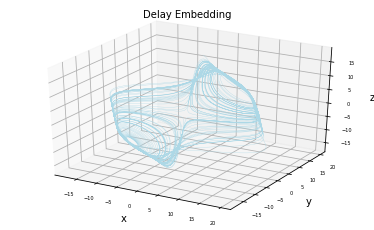

In [8]:
X = delay_embedding(x, 20, 3)
plot_trajectories(X[0], X[1], X[2], 'Delay Embedding', 'line')


In [15]:
# Uniform re-sampling
lorenz  = np.column_stack((X[0], X[1], X[2]))
resampled_lorenz = voxel_down_sample(lorenz, 0.65)
print(len(lorenz), len(resampled_lorenz))

9964 2948


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


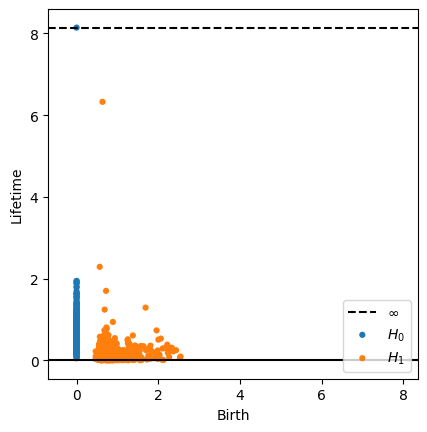

In [16]:
from ripser import Rips
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 32s, sys: 2.41 s, total: 1min 35s
Wall time: 1min 35s


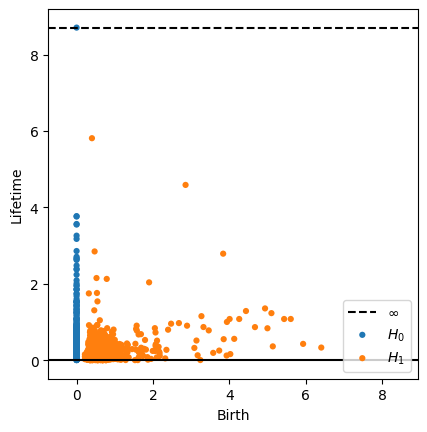

In [17]:
%%time
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)

### $\tau$=10, D=4

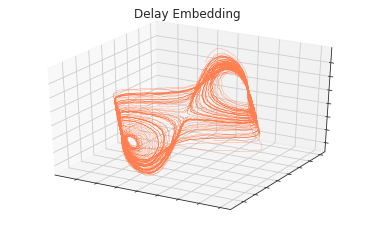

In [11]:
X = delay_embedding(x_noise, 10, 4)

plot_trajectories(X[0], X[2], X[3], 'Delay Embedding', 'line')

In [13]:
# Uniform re-sampling
lorenz  = np.column_stack((X[0], X[1], X[2], X[3]))
resampled_lorenz = voxel_down_sample(lorenz, 0.8)
print(len(lorenz), len(resampled_lorenz))

9970 3265


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 26.6 s, sys: 704 ms, total: 27.3 s
Wall time: 27.1 s


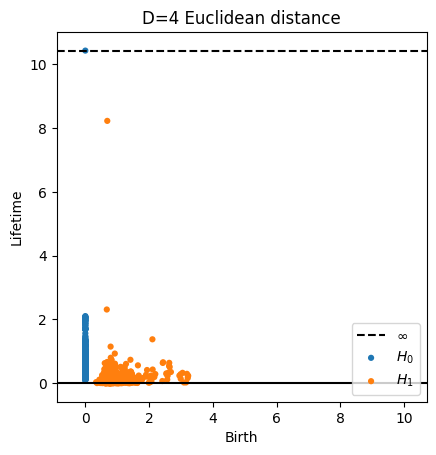

In [22]:
%%time
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)
plt.title('D=4 Euclidean distance')
plt.savefig('PH_lorenz_D=4_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 39s, sys: 1.61 s, total: 1min 40s
Wall time: 1min 40s


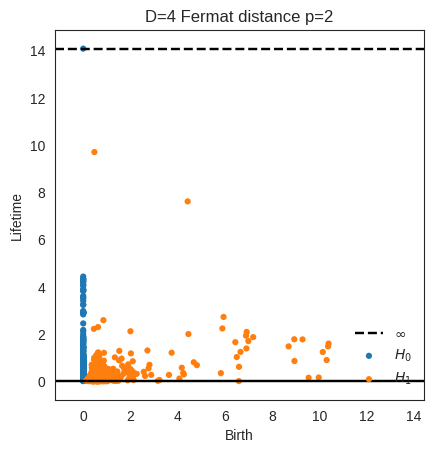

In [17]:
%%time
sns.set_style('white')
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True, colormap='seaborn')
plt.title('D=4 Fermat distance p=2')
plt.savefig('PH_lorenz_D=4_p=2_noise.png',  bbox_inches='tight')

### $\tau$=10, D=5

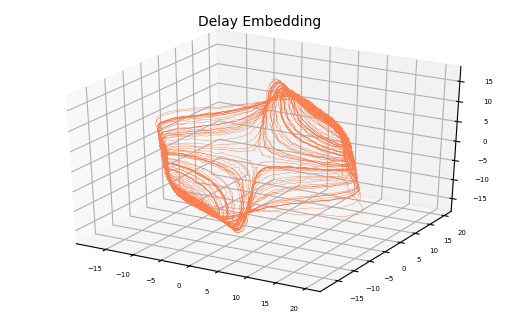

In [91]:
X = delay_embedding(x_noise, 10, 5)

plot_trajectories(X[0], X[2], X[4], 'Delay Embedding', 'line')

In [92]:
# Uniform re-sampling
lorenz  = np.column_stack((X[0], X[1], X[2], X[3], X[4]))
resampled_lorenz = voxel_down_sample(lorenz, 1.05)
print(len(lorenz), len(resampled_lorenz))

9960 3279


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 40.9 s, sys: 1.19 s, total: 42.1 s
Wall time: 41.8 s


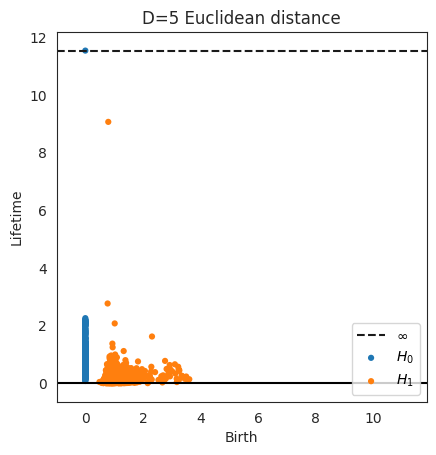

In [93]:
%%time
sns.set_style('white')
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)
plt.title('D=5 Euclidean distance')
plt.savefig('PH_lorenz_D=5_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 33.7 s, sys: 1.35 s, total: 35 s
Wall time: 34.7 s


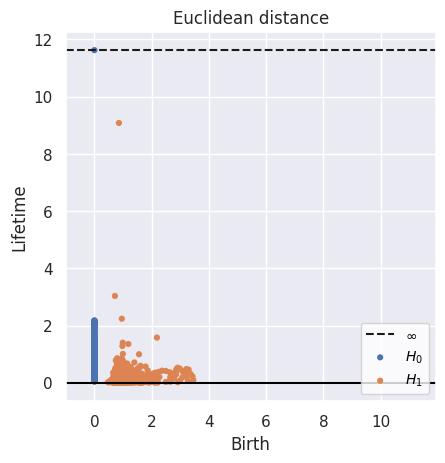

In [26]:
%%time
sns.set()
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)
plt.title('Euclidean distance')
plt.savefig('PH_lorenz_D=5.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 49s, sys: 2.46 s, total: 1min 52s
Wall time: 1min 52s


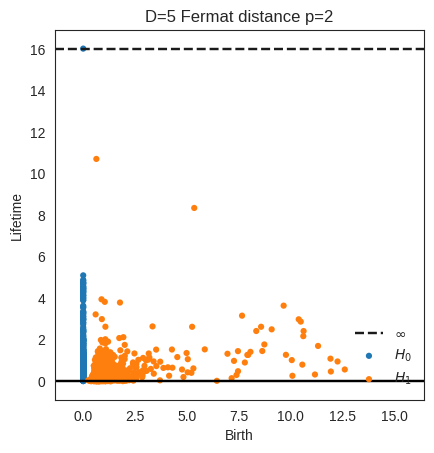

In [98]:
%%time
sns.set_style('white')
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True, colormap='seaborn')
plt.title('D=5 Fermat distance p=2')
plt.savefig('PH_lorenz_D=5_p=2_noise.png',  bbox_inches='tight')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 27s, sys: 1.56 s, total: 1min 29s
Wall time: 1min 29s


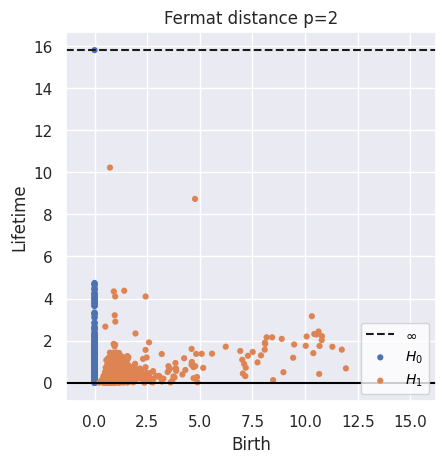

In [27]:
%%time
sns.set()
fermat_distances = compute_fermat_distance(resampled_lorenz, 2)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)
plt.title('Fermat distance p=2')
plt.savefig('PH_lorenz_D=5_p=2.png',  bbox_inches='tight')

### El atractor de Rossler

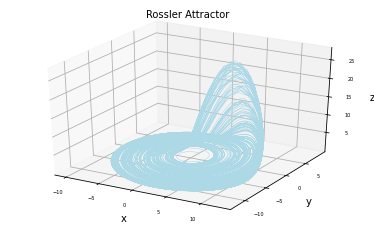

In [21]:
# Rossler parameters and initial conditions
a=0.2
b=0.2
c=6.3
x0, y0, z0 = 1,1,1
# Maximum time point and total number of time points
tmax, n = 1000, 10000
x,y,z = simulate(Rossler, a, b, c, x0, y0, z0, tmax, n)
plot_trajectories(x, y, z, 'Rossler Attractor', 'line')

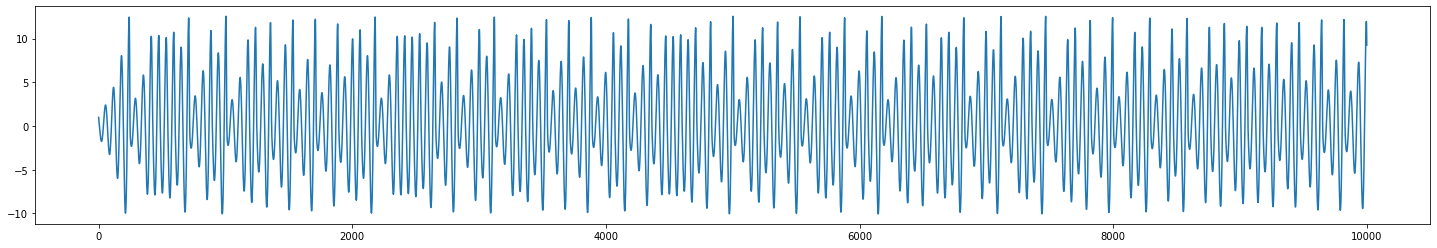

In [24]:
plt.figure(figsize=(25,4))
plt.plot(x)

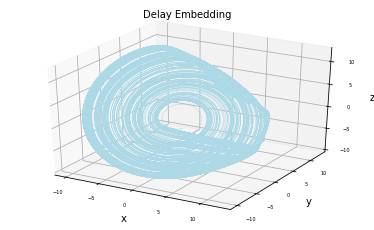

In [26]:
xs, ys, zs = delay_embedding(x, 10)

plot_trajectories(xs, ys, zs, 'Delay Embedding', 'line')

In [27]:
# Uniform re-sampling
rossler  = np.column_stack((xs, ys, zs))
resampled_rossler = voxel_down_sample(rossler, 0.5)
print(len(rossler), len(resampled_rossler))

9980 3016


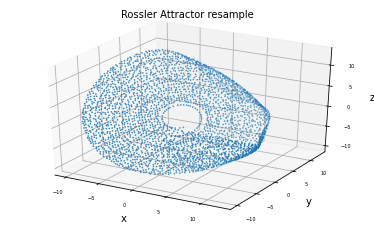

In [28]:
plot_trajectories(resampled_rossler[:,0],resampled_rossler[:,1],resampled_rossler[:,2], 'Rossler Attractor resample', 'scatter')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 23.4 s, sys: 1.34 s, total: 24.7 s
Wall time: 25.6 s


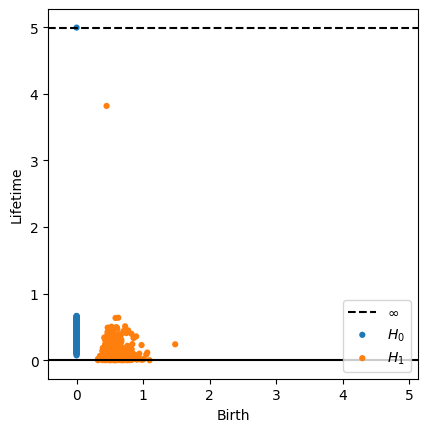

In [46]:
%%time
rips = Rips()
dgms = rips.fit_transform(resampled_rossler)
rips.plot(dgms, lifetime = True)

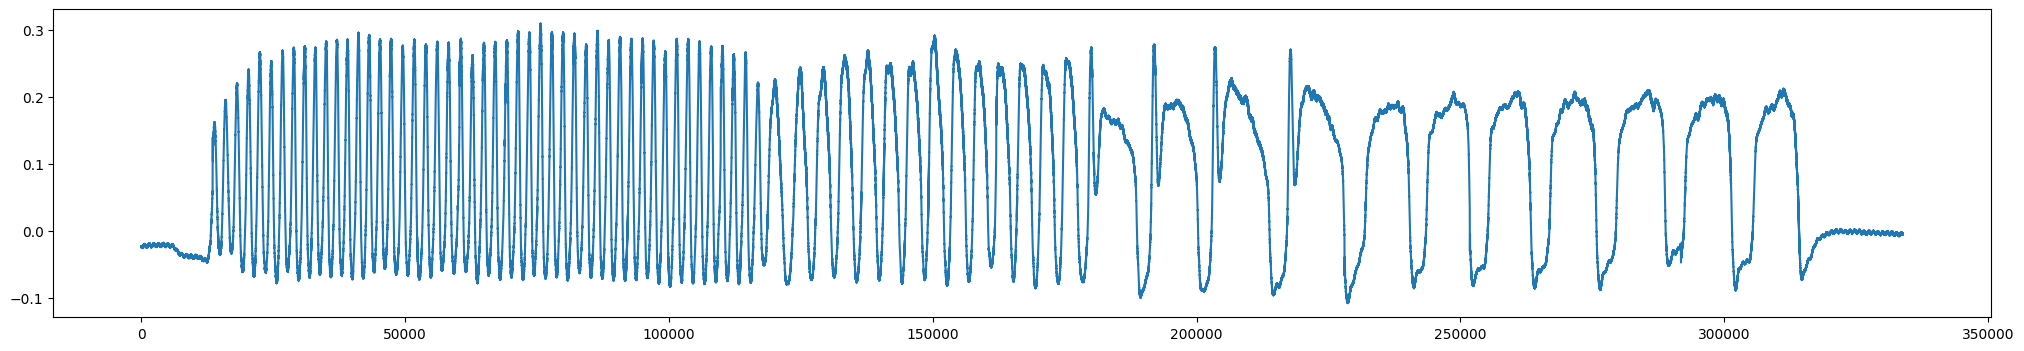

In [31]:
import numpy as np
import matplotlib.pyplot as plt
s = np.loadtxt('Presion_canario.txt')
plt.figure(figsize=(25,4))
plt.plot(s)

In [36]:
from utils import *
X = delay_embedding(s, 500, 3)

plot_trajectories(X[:,0], X[:,1], X[:,2], 'Delay Embedding Canary', 'line')

IndexError: too many indices for array

In [14]:
data  = np.column_stack((xs, ys, zs))
resample = voxel_down_sample(data, 0.02)
print(len(data), len(resample))

332871 1724


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 14.7 s, sys: 741 ms, total: 15.5 s
Wall time: 15.5 s


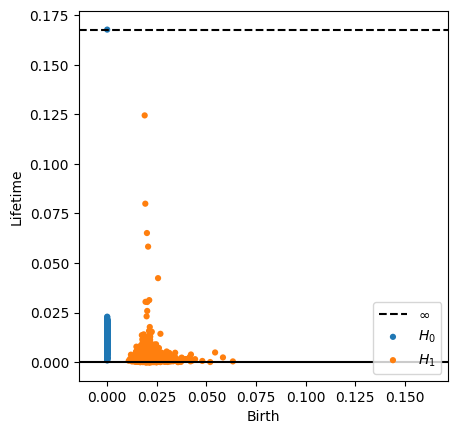

In [18]:
%%time

rips = Rips()
diagrams = rips.fit_transform(resample)
rips.plot(diagrams, lifetime=True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 41 s, sys: 1.4 s, total: 42.4 s
Wall time: 42.4 s


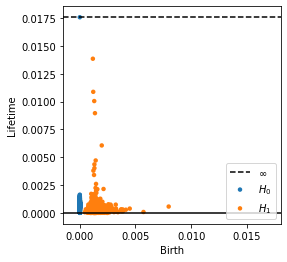

In [16]:
%%time
fermat_distances = compute_fermat_distances(resample, 1.7)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)

In [6]:
data  = np.column_stack((xs, ys, zs))
resample = voxel_down_sample(data, 0.015)
print(len(data), len(resample))

332871 3111


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 1min 20s, sys: 3.01 s, total: 1min 23s
Wall time: 1min 41s


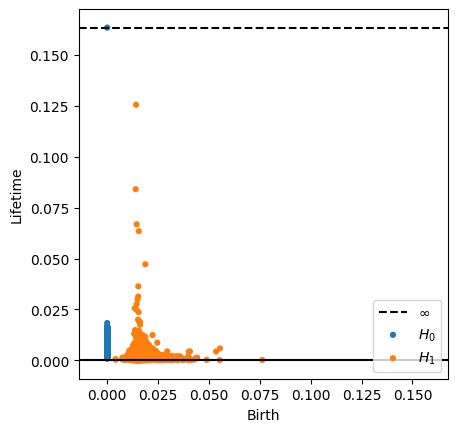

In [21]:
%%time

rips = Rips()
diagrams = rips.fit_transform(resample)
rips.plot(diagrams, lifetime=True)

In [ ]:
%%time
fermat_distances = compute_fermat_distances(resample, 1.7)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)

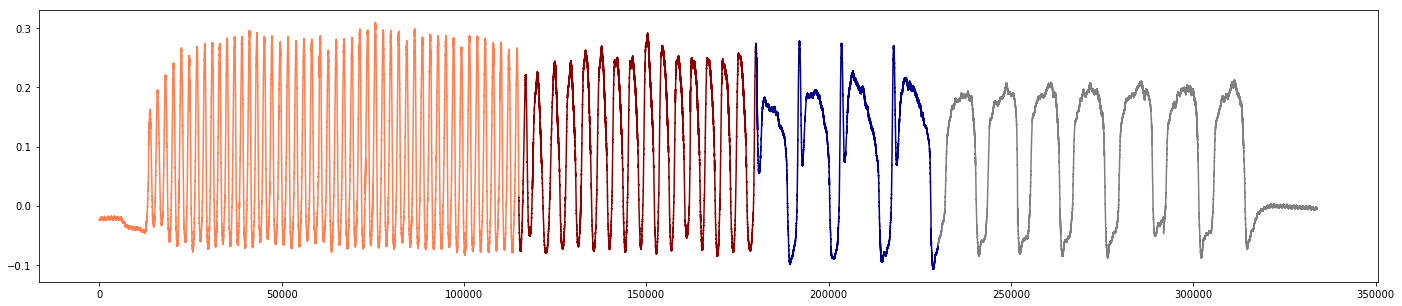

In [36]:
cuts = cuts= [0,115000, 180000, 230000, len(s)]
fig = plt.figure(figsize=(24,5))
color = ['coral', 'darkred', 'darkblue', 'grey']
for i in range(4):
    n=cuts[i]
    N=cuts[i+1]
    plt.plot(range(n,N), s[n:N], color = color[i])

plt.savefig('canario_time_series.png')

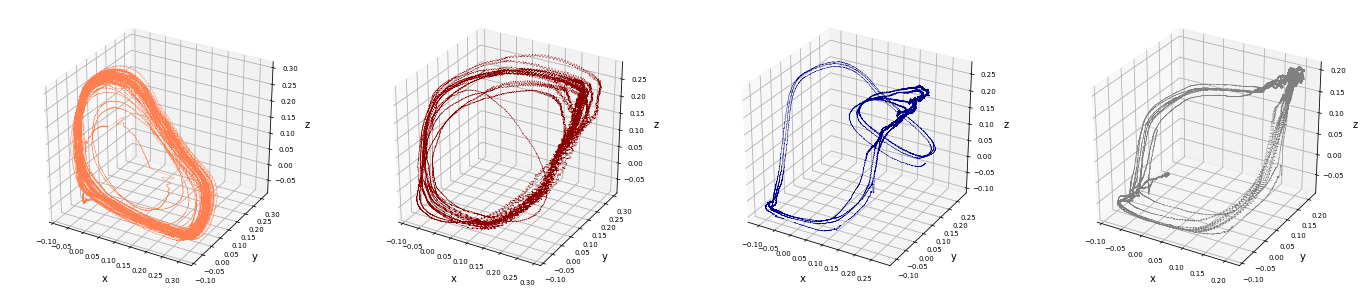

In [37]:
T=500
cuts = cuts= [0,115000, 180000, 230000, len(s)]
fig = plt.figure(figsize=(24,5))
color = ['coral', 'darkred', 'darkblue', 'grey']
subplot = [111,112,113,114]
for i in range(4):
    n=cuts[i]
    N=cuts[i+1]
    xs = s[n:N-2*T]
    ys = s[n+T:N-T]
    zs = s[n+2*T:N]
    ax = fig.add_subplot(1,4,i+1, projection = '3d')
    ax.plot(xs, ys, zs, lw=0.3, color = color[i])
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    plt.tick_params(labelsize=7)

plt.savefig('canario_embedding_cut.png')